<a href="https://colab.research.google.com/github/beyzakartaal/yaz-l-mproje_veriseti/blob/main/animal_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##YOLOv8 Animal Detection


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Environment


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pwd

'/content'

In [ ]:
%cd /content/drive/MyDrive/Biovision/Animal_Detection

/content/drive/MyDrive/Biovision/Animal_Detection


In [2]:
 %pip install ultralytics

 import ultralytics
 ultralytics.checks()

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/201.2 GB disk)


Test/Prediction

In [ ]:
!yolo detect predict model=/content/drive/MyDrive/Biovision/Animal_Detection/runs/detect/yolov8x-animal-detection8/weights/best.pt source="/content/drive/MyDrive/Biovision/Animal_Detection/data/Leopard/images/test" save=True

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs

image 1/479 /content/drive/MyDrive/Biovision/Animal_Detection/data/Leopard/images/test/lprd_frames201926_jpeg.rf.6add374692c5828e520bd9788794390f.jpg: 640x640 1 Leopard, 85.7ms
image 2/479 /content/drive/MyDrive/Biovision/Animal_Detection/data/Leopard/images/test/lprd_frames201931_jpeg.rf.fd8a9385b8ce5d37abba3a8115f38687.jpg: 640x640 1 Leopard, 96.9ms
image 3/479 /content/drive/MyDrive/Biovision/Animal_Detection/data/Leopard/images/test/lprd_frames201941_jpeg.rf.7aff3bc916ffefd2d3ffd427e9a10042.jpg: 640x640 1 Leopard, 81.7ms
image 4/479 /content/drive/MyDrive/Biovision/Animal_Detection/data/Leopard/images/test/lprd_frames201946_jpeg.rf.84d041c6d00f6569401cb6e3f7c84b44.jpg: 640x640 1 Leopard, 59.1ms
image 5/479 /content/drive/MyDrive/Biovision/Animal_Detection/data/Leopard/images/test/lprd_frames201951_jpeg.rf.f65e413f8

python Implementation


Dataset


In [ ]:
!unzip /content/drive/MyDrive/Biovision/Animal_Detection/data/Leopard.zip -d ./data ##zip ayrıştırması

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: ./data/Leopard/images/train/lprd_frames000946_jpeg.rf.e24b5edc00a041f7d741d860c568c14c.jpg  
  inflating: ./data/Leopard/images/train/lprd_frames000966_jpeg.rf.37429b664398d7f9ac413a05b0f7ce10.jpg  
  inflating: ./data/Leopard/images/train/lprd_frames000986_jpeg.rf.6cf86d6f9463ecae203245b85d2439ea.jpg  
  inflating: ./data/Leopard/images/train/lprd_frames000991_jpeg.rf.2961e3451dc7c546bd8688ac095db6e1.jpg  
  inflating: ./data/Leopard/images/train/lprd_frames001001_jpeg.rf.c26d6ee36c41164a978aea9acbe9db46.jpg  
  inflating: ./data/Leopard/images/train/lprd_frames00101_jpeg.rf.1baa2b4dc769f48722f1550080d4cdcd.jpg  
  inflating: ./data/Leopard/images/train/lprd_frames001021_jpeg.rf.12fe9d9d7ced60ac1398834d17eeb94a.jpg  
  inflating: ./data/Leopard/images/train/lprd_frames001041_jpeg.rf.ba2d08f88ec4207e99194dfe856cc895.jpg  
  inflating: ./data/Leopard/images/train/lprd_frames001076_jpeg.rf.7ac5d8acb7e19896f25b50875cf8d22f.jpg  


TRAİN


Prediction

In [3]:
import cv2
import imutils
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


0: 608x640 1 Leopard, 79.2ms
Speed: 2.8ms preprocess, 79.2ms inference, 1.8ms postprocess per image at shape (1, 3, 608, 640)


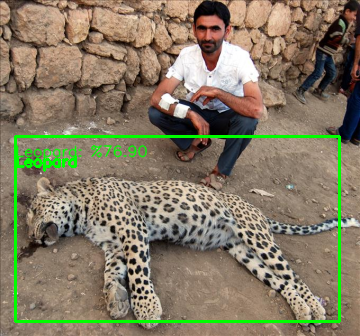

In [10]:
img_path="/content/drive/MyDrive/Biovision/thumbs_b2_a7cbfa078c525902a5a26640f715c9f7.jpg" ## bu yolu elde etmek için googledan resmi masaüstüne kaydedip sonra colaba istediğin yere sürükle
model_path="/content/drive/MyDrive/Biovision/Animal_Detection/runs/detect/yolov8x-animal-detection8/weights/best.pt"

font=cv2.FONT_HERSHEY_SIMPLEX

model= YOLO(model_path)
img= cv2.imread(img_path)
img= imutils.resize(img, width=360)

results= model(img)[0]

threshold= 0.5
for result in results.boxes.data.tolist():
  x1,y1,x2,y2,score,class_id = result
  x1,y1,x2,y2,class_id =int(x1),int(y1),int(x2),int(y2),int(class_id)
  if score > threshold:
    cv2.rectangle(img,(x1,y1),(x2,y2),(0,255,0),2)

    class_name= results.names[class_id]
    cv2.putText(img,class_name,(x1,y1+30),font,0.5,(0,255,0),2)
    score= score*100

    text= f"{class_name}: %{score:.2f}"
    cv2.putText(img,text,(x1,y1+20),font,0.5,(0,255,0),1,cv2.LINE_AA)


cv2_imshow(img)

In [ ]:
!yolo detect train data=/content/drive/MyDrive/Biovision/Animal_Detection/data/config.yaml model=yolov8x.pt epochs=100 patience=30 imgsz=640 workers =8 batch=12 device=0 name=yolov8x-animal-detection

Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/drive/MyDrive/Biovision/Animal_Detection/data/config.yaml, epochs=100, time=None, patience=30, batch=12, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=yolov8x-animal-detection8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False,